In [1]:
import os

from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
from sklearn.metrics import *
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/Enzyme Substrate'

In [3]:
train_df   = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df    = pd.read_csv(f'{DATA_PATH}/test.csv')
submission = pd.read_csv(f'{DATA_PATH}/sample_submission.csv') 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [4]:
for df in [train_df, test_df]:
    
    df.drop('id', axis = 1, inplace = True)

train_df.drop(['EC3', 'EC4', 'EC5', 'EC6'], axis = 1, inplace = True)

In [5]:
train_ec2    = train_df.drop(['EC2'], axis = 1)
train, valid = train_test_split(train_ec2, test_size = 0.2, random_state = 99)

In [6]:
model_ec2      = setup(train_ec2, target = 'EC1', session_id = 999,
                       normalize = True, normalize_method = 'minmax')
best_auc_model = compare_models(sort = 'AUC', n_select = 3)
holdout_pred   = predict_model(best_auc_model[0])
predictions    = predict_model(best_auc_model[0], data = test_df)

,Description,Value
0,Session id,999
1,Target,EC1
2,Target type,Binary
3,Original data shape,"(14838, 32)"
4,Transformed data shape,"(14838, 32)"
5,Transformed train set shape,"(10386, 32)"
6,Transformed test set shape,"(4452, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7043,0.7035,0.8629,0.7385,0.7958,0.2716,0.2828,0.4070
ada,Ada Boost Classifier,0.6987,0.6977,0.8500,0.7384,0.7902,0.2649,0.2735,0.3980
lightgbm,Light Gradient Boosting Machine,0.7000,0.6947,0.8617,0.7348,0.7932,0.2593,0.2708,0.3010
et,Extra Trees Classifier,0.6994,0.6946,0.8597,0.7351,0.7925,0.2592,0.2702,0.7830
rf,Random Forest Classifier,0.6984,0.6945,0.8557,0.7358,0.7912,0.2594,0.2693,0.6790
lda,Linear Discriminant Analysis,0.6950,0.6718,0.8908,0.7193,0.7959,0.2184,0.2393,0.2270
lr,Logistic Regression,0.6935,0.6713,0.9043,0.7134,0.7976,0.2015,0.2276,1.2560
xgboost,Extreme Gradient Boosting,0.6844,0.6713,0.8384,0.7295,0.7801,0.2306,0.2379,0.2510
qda,Quadratic Discriminant Analysis,0.4436,0.6687,0.2209,0.8124,0.3252,0.0864,0.1410,0.2450
nb,Naive Bayes,0.3991,0.6626,0.1365,0.8010,0.2005,0.0500,0.0947,0.2510


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6995,0.6947,0.8550,0.7370,0.7917,0.2630,0.2726


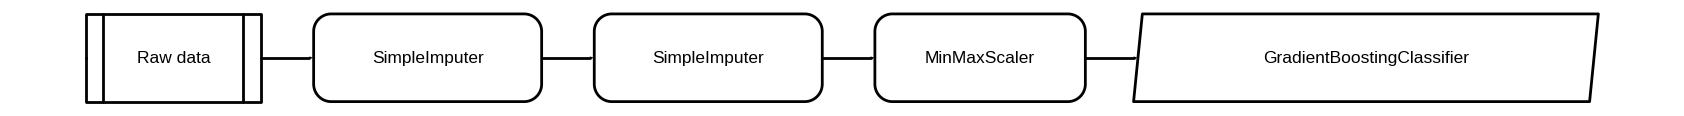




============================== auc ==============================


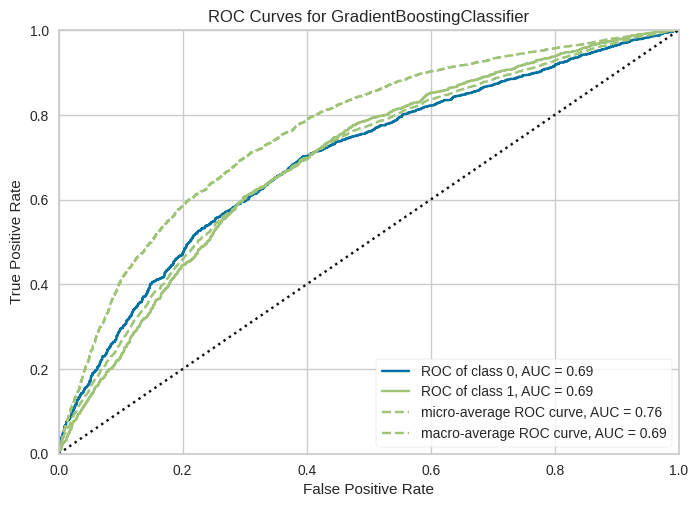




============================== pr ==============================


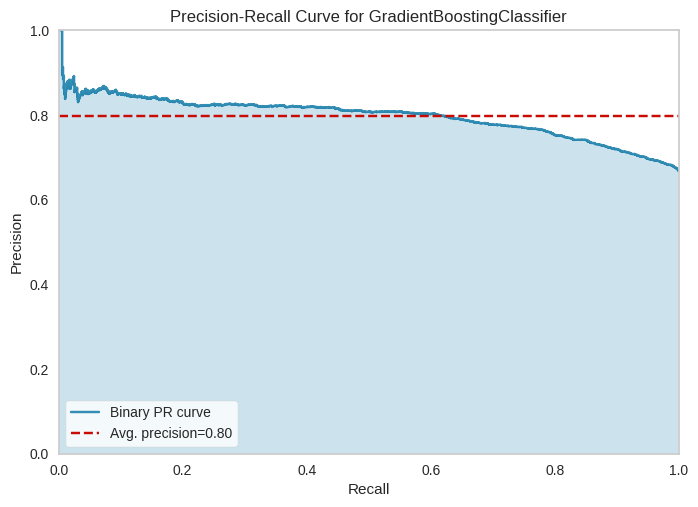




============================== confusion_matrix ==============================


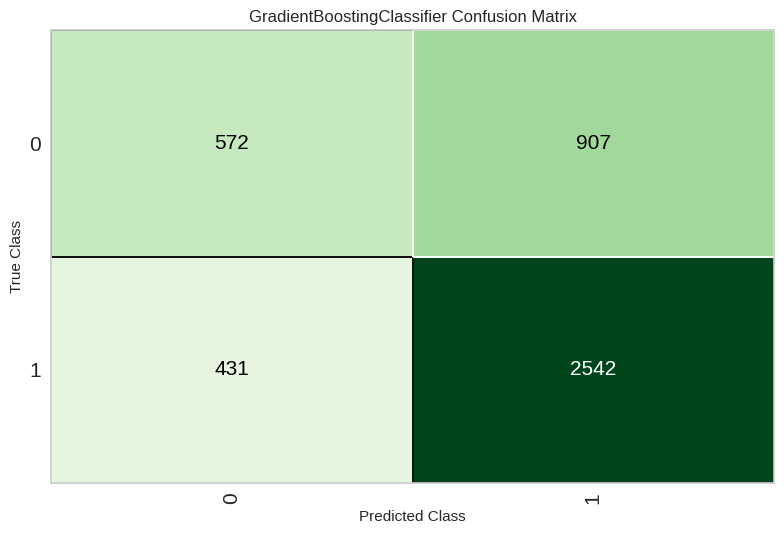




============================== error ==============================


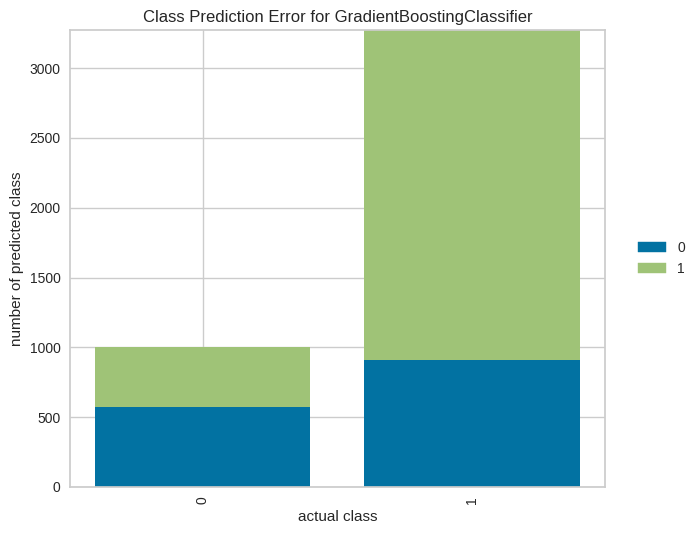




============================== class_report ==============================


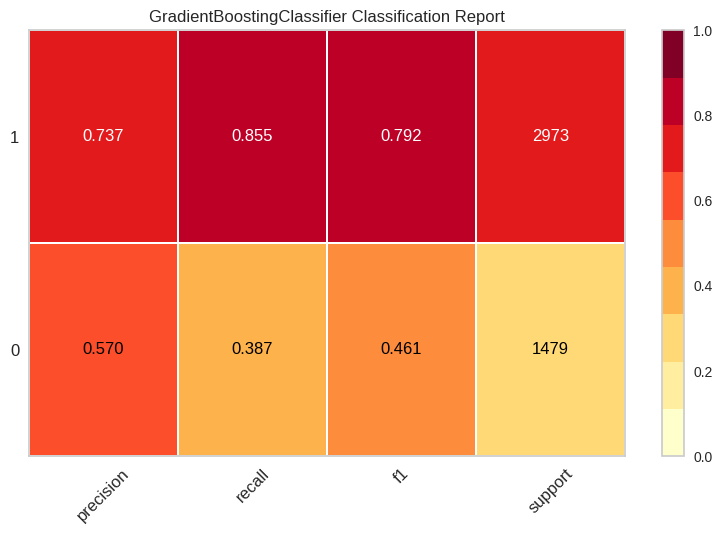




============================== calibration ==============================


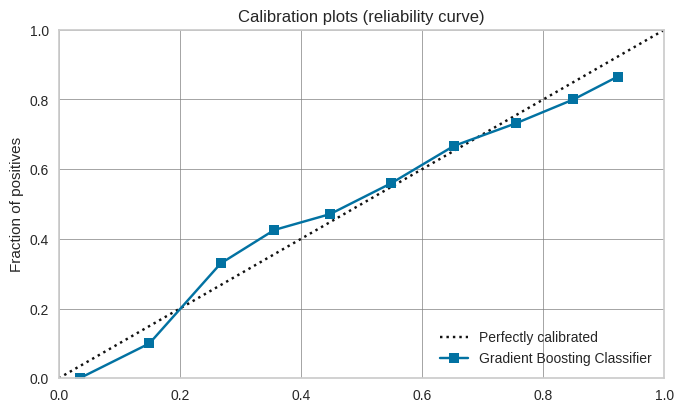




============================== feature ==============================


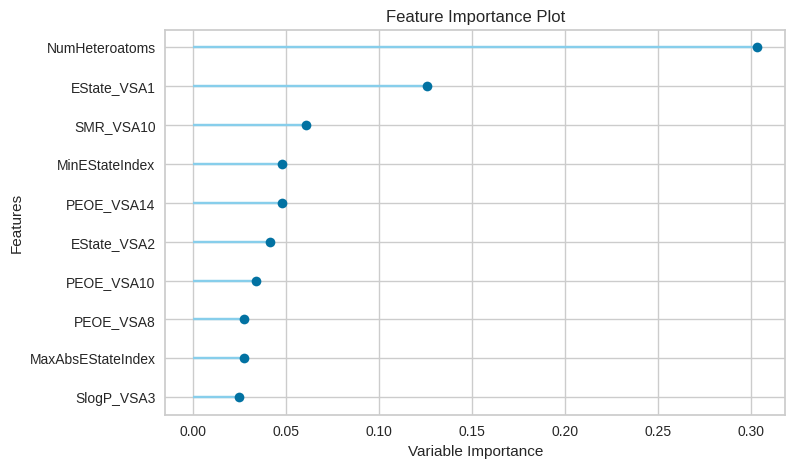




============================== parameter ==============================


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





============================== lift ==============================


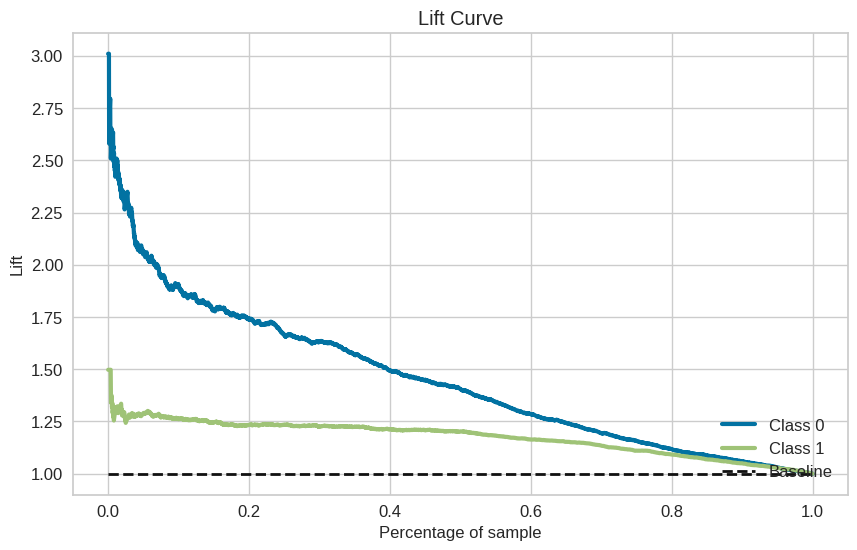




============================== gain ==============================


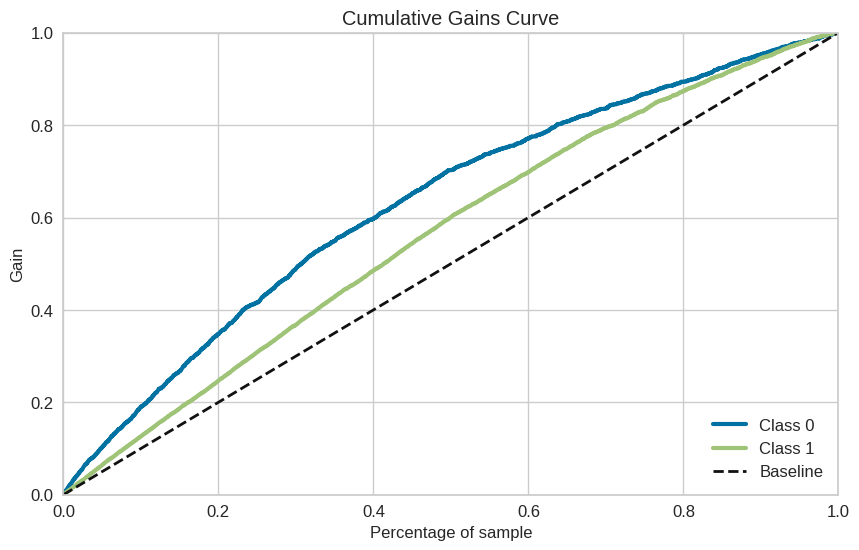

In [7]:
available_plots = ['pipeline', 'auc', 'pr', 'confusion_matrix',
                   'error'   , 'class_report', 'calibration', 'feature',
                   'parameter', 'lift', 'gain']

for idx in available_plots:
    print('==='*10, idx, '==='*10)
    plot_model(best_auc_model[0], plot = idx)
    print('\n\n')

In [8]:
blender = blend_models(best_auc_model)
blender

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7161,0.7074,0.8818,0.7418,0.8058,0.2924,0.3080
1,0.7247,0.7253,0.8775,0.7519,0.8098,0.3221,0.3351
2,0.7016,0.7077,0.8703,0.7330,0.7958,0.2570,0.2704
3,0.7045,0.7080,0.8703,0.7357,0.7974,0.2659,0.2791
4,0.6939,0.6843,0.8674,0.7271,0.7911,0.2353,0.2486
5,0.7103,0.7243,0.8874,0.7339,0.8034,0.2714,0.2899
6,0.6908,0.6789,0.8499,0.7308,0.7859,0.2407,0.2498
7,0.7119,0.6974,0.8557,0.7487,0.7987,0.3005,0.3089
8,0.6936,0.6770,0.8413,0.7370,0.7857,0.2567,0.2637


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=999, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [9]:
holdout_pred = predict_model(blender)
predictions  = predict_model(blender, data = test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7010,0.6935,0.8584,0.7371,0.7932,0.2651,0.2754


In [10]:
submission['EC1'] = predictions['prediction_label']
submission.head()

,id,EC1,EC2
0,14838,0,0.5
1,14839,1,0.5
2,14840,1,0.5
3,14841,1,0.5
4,14842,1,0.5


In [11]:
submission.EC1

0       0
1       1
2       1
3       1
4       1
       ..
9888    1
9889    1
9890    0
9891    0
9892    0
Name: EC1, Length: 9893, dtype: int64

In [12]:
train_ec1 = train_df.drop(['EC1'], axis = 1)
model_ec1 = setup(data = train, target = 'EC1', session_id = 998, 
                  normalize_method = 'minmax', normalize = True)
best_auc_model = compare_models(sort = 'AUC',  n_select = 3)

,Description,Value
0,Session id,998
1,Target,EC1
2,Target type,Binary
3,Original data shape,"(11870, 32)"
4,Transformed data shape,"(11870, 32)"
5,Transformed train set shape,"(8309, 32)"
6,Transformed test set shape,"(3561, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7035,0.7037,0.8645,0.7378,0.7961,0.2647,0.2762,0.4440
ada,Ada Boost Classifier,0.7043,0.6985,0.8611,0.7400,0.7959,0.2702,0.2809,0.4130
rf,Random Forest Classifier,0.7049,0.6955,0.8638,0.7395,0.7968,0.2698,0.2810,0.6340
et,Extra Trees Classifier,0.7067,0.6943,0.8672,0.7398,0.7984,0.2726,0.2846,0.8150
lightgbm,Light Gradient Boosting Machine,0.6998,0.6915,0.8623,0.7353,0.7937,0.2554,0.2669,0.3060
lda,Linear Discriminant Analysis,0.6977,0.6723,0.8868,0.7240,0.7971,0.2273,0.2464,0.2490
xgboost,Extreme Gradient Boosting,0.6824,0.6722,0.8293,0.7322,0.7776,0.2293,0.2348,0.3280
lr,Logistic Regression,0.6958,0.6717,0.9006,0.7174,0.7986,0.2083,0.2325,0.2510
qda,Quadratic Discriminant Analysis,0.4394,0.6695,0.2080,0.8185,0.3246,0.0852,0.1417,0.2710
nb,Naive Bayes,0.3970,0.6587,0.1432,0.7846,0.2003,0.0444,0.0830,0.2590


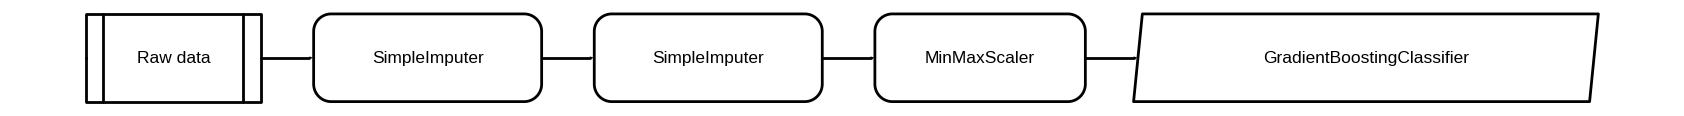




============================== auc ==============================


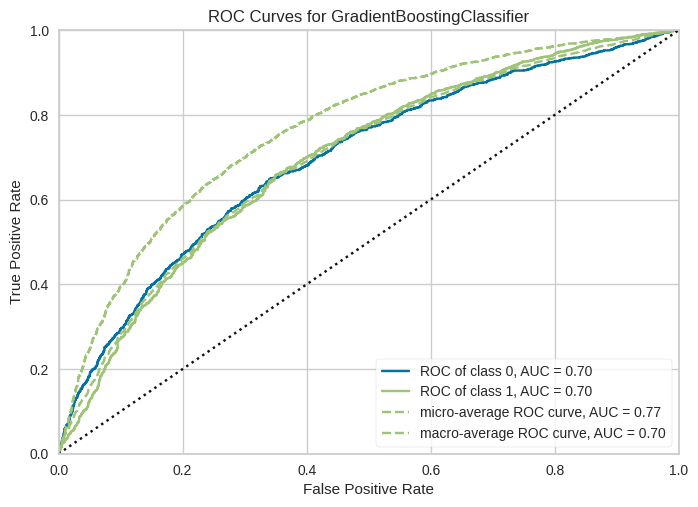




============================== pr ==============================


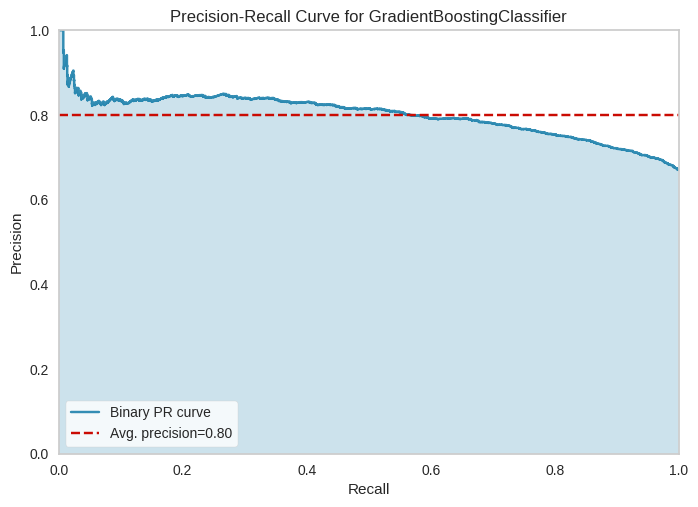




============================== confusion_matrix ==============================


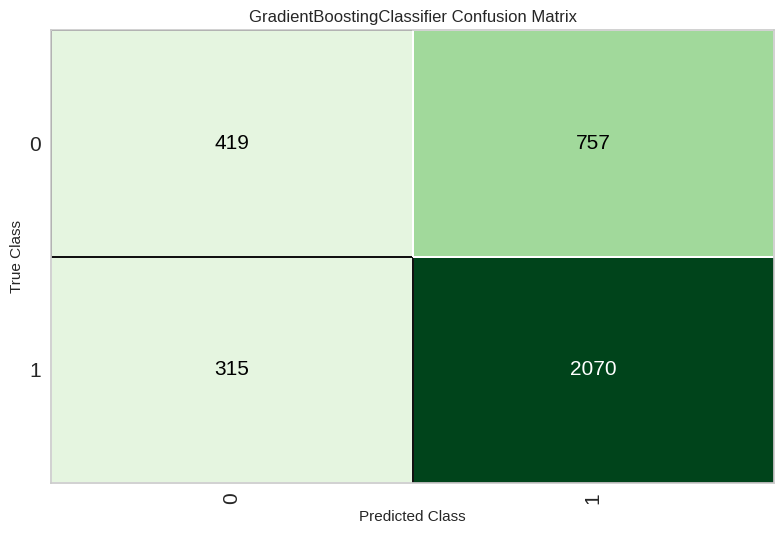




============================== error ==============================


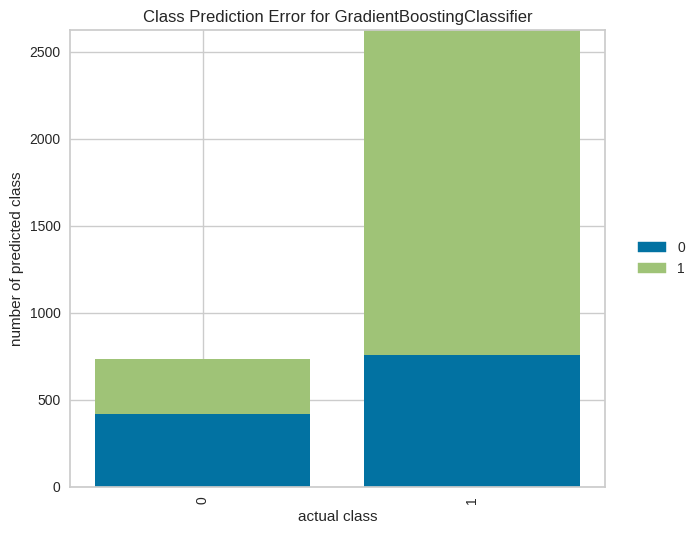




============================== class_report ==============================


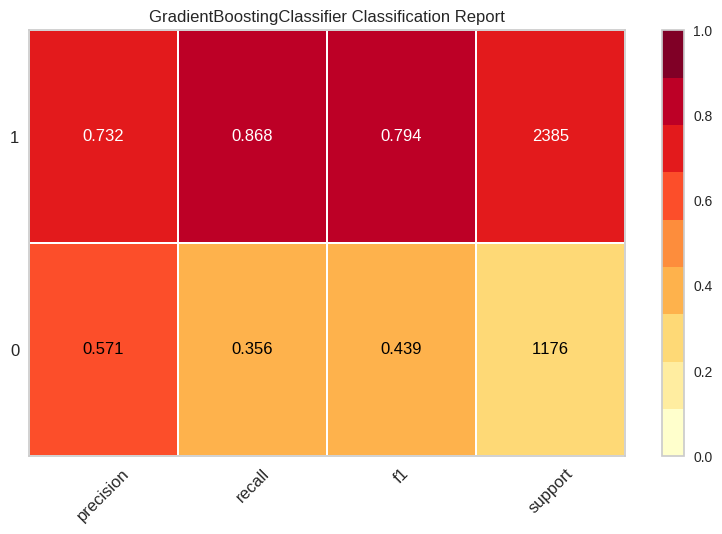




============================== calibration ==============================


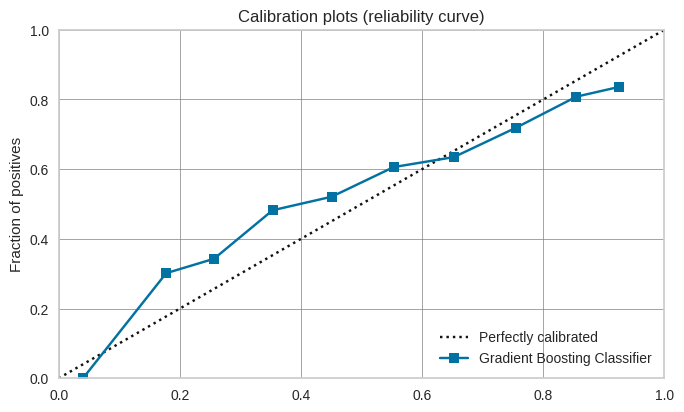




============================== feature ==============================


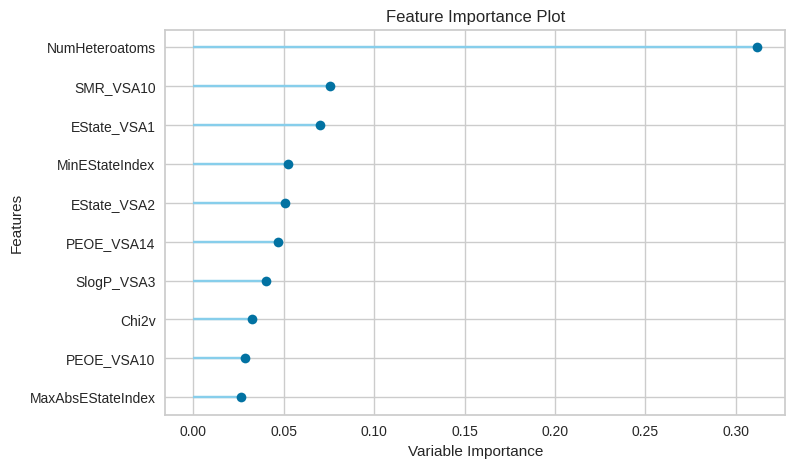




============================== feature_all ==============================


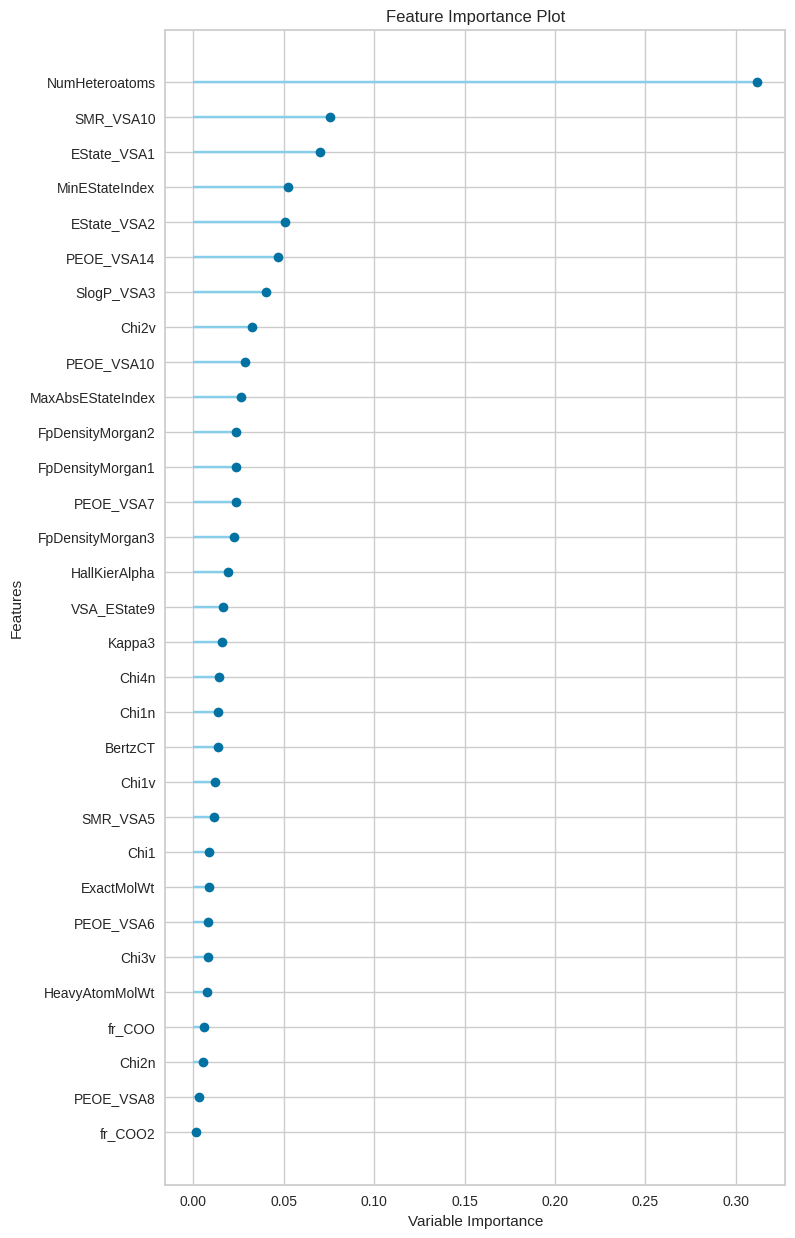




============================== parameter ==============================


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





============================== lift ==============================


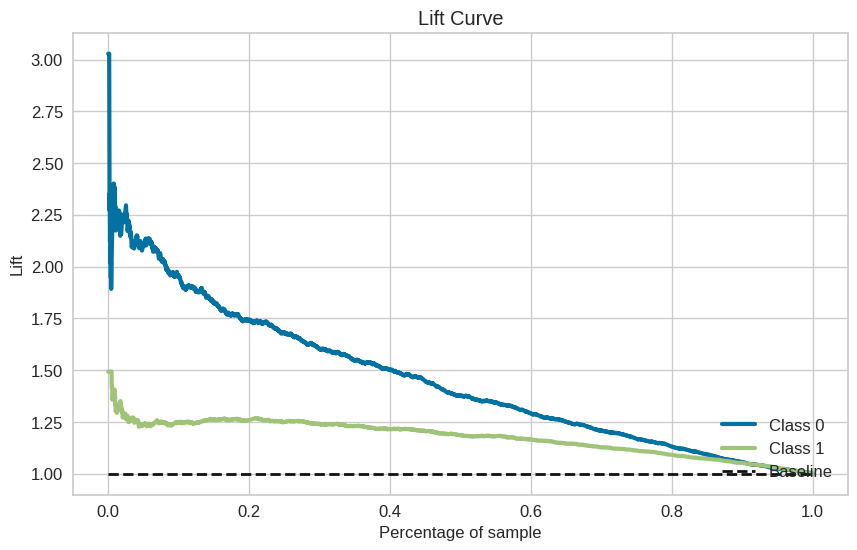




============================== gain ==============================


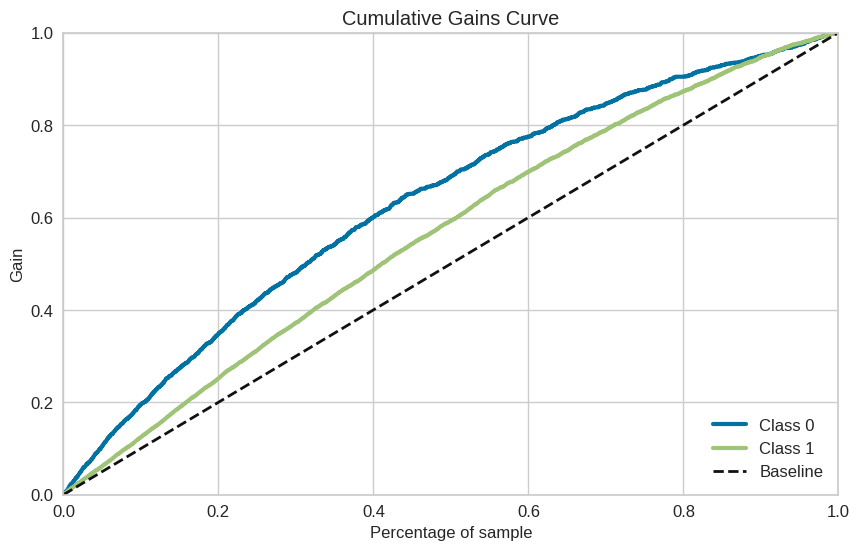

In [13]:
available_plots = ['pipeline','auc','pr','confusion_matrix','error','class_report','calibration','feature','feature_all','parameter','lift','gain']
    
for plot in available_plots:
    print('==='*10, plot,'==='*10, sep=' ')
    plot_model(best_auc_model[0],plot=plot)
    print('\n\n')

In [14]:
predictions.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,prediction_label,prediction_score
0,344.632385,7.283604,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458580,0.000000,...,0.00000,0.000000,26.809273,24.539801,4.794537,47.304081,1,1,0,0.5736
1,1432.410156,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,98.32399,9.606882,0.000000,53.378235,0.000000,43.166668,0,0,1,0.7274
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969306,6.420822,...,0.00000,6.420822,11.752550,13.344559,9.589074,24.666666,1,1,1,0.6582
3,150.255707,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.00000,0.000000,17.744066,32.290169,4.794537,26.778866,0,0,1,0.6765
4,1817.276367,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554970,47.360207,...,0.00000,37.098999,69.141350,38.704128,50.697491,102.583336,0,0,1,0.6886


In [15]:
os.makedirs('submissions/enzyme', exist_ok = True)

submission['EC2'] = predictions['prediction_label']
submission.head()

submission.to_csv('submissions/enzyme/enzyme.csv', index = False)